# Car Price Prediction Model

In [92]:
import warnings

In [159]:
warnings.filterwarnings('ignore')   #To ignore warnings

In [158]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set_theme(color_codes= True)

In [160]:
#Importing Dataset
data= pd.read_csv('car dekho.csv')   

In [96]:
#First 5 rows of our Dataset
data.head()

,name,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [161]:
#Last 5 rows of our Dataset
data.tail()

,name,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,Renault,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [162]:
# To check shape of our Datset- Number of Rows and Columns
print("Number of rows", data.shape[0]) 
print("Number of columns", data.shape[1])

Number of rows 4340
Number of columns 9


In [100]:
#To verify the dataset's overall information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   brand          4340 non-null   object
 2   year           4340 non-null   int64 
 3   selling_price  4340 non-null   int64 
 4   km_driven      4340 non-null   int64 
 5   fuel           4340 non-null   object
 6   seller_type    4340 non-null   object
 7   transmission   4340 non-null   object
 8   owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


- The data type and non-null values in our dataset were verified using info method.

In [101]:
#To check null values in the Dataset
data.isnull().sum()

name             0
brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

- Our data collection has zero null values.

### Exploratory data analysis 

In [102]:
#To learn about our dataset's overall statistics
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


- Count: There are 4,340 observations for each variable, indicating the total number of data points available.
- Mean: The average selling price is around 504,127.3, and the average kilometers driven is approximately 66,215.78.
- Minimum (min): The minimum year recorded is 1992, the minimum selling price is 20,000, and the minimum kilometers driven is 1.
- Maximum (max): The maximum year recorded is 2020, the maximum selling price is 89,00,000, and the maximum kilometers driven is 806,599.

These statistics provide insights into the central tendency, variability, and range of the data, which can aid in understanding the distribution and characteristics of the variables.

In [165]:
#Manufacturer Distribution of Vehicles for Resale
Manufacturer = data['brand'].value_counts().to_frame()
Manufacturer.rename(columns={"brand" : "value_counts"}, inplace = True)
Manufacturer.index.name = "Manufacturer"
Manufacturer

,value_counts
Manufacturer,
Maruti,1280
Hyundai,821
Mahindra,365
Tata,361
Honda,252
Ford,238
Toyota,206
Chevrolet,188
Renault,146


In [104]:
# Top 10 Manufacturers with the Highest Number of Vehicles Available for Resale
top_10= Manufacturer.head(10)
print(top_10)

              value_counts
Manufacturer              
Maruti                1280
Hyundai                821
Mahindra               365
Tata                   361
Honda                  252
Ford                   238
Toyota                 206
Chevrolet              188
Renault                146
Volkswagen             107


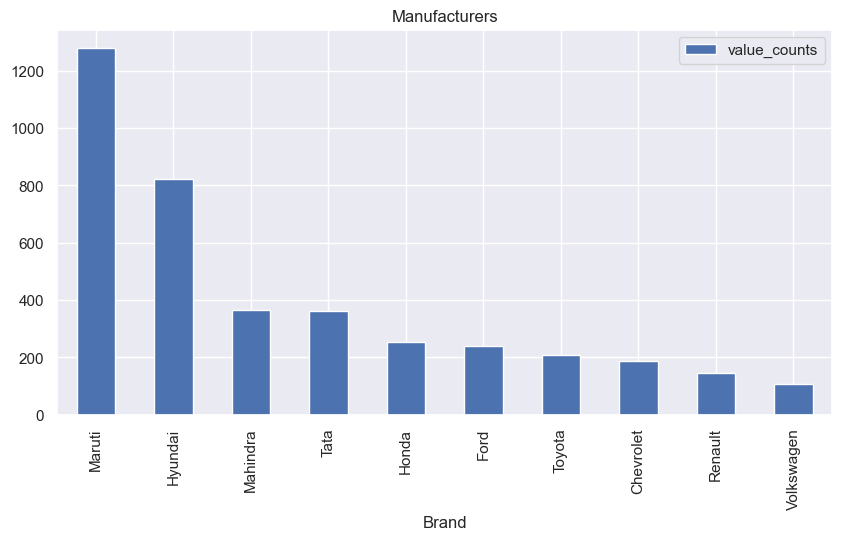

In [105]:
#Bar Graph of top Manufacturers with the Highest Number of Vehicles Available for Resale
top_10.plot(kind='bar', figsize=(10,5))
plt.xlabel('Brand')
plt.title('Manufacturers')

plt.show()

- The graph above demonstrates that the Maruti has the highest count with 1280 vehicles, followed by Hyundai with 821 vehicles. Mahindra, Tata, and Honda also have a significant number of vehicles available for resale with counts of 365, 361, and 252, respectively. Ford, Toyota, Chevrolet, Renault, and Volkswagen complete the top 10 list with counts ranging from 238 to 107. 

These figures provide an overview of the popularity and availability of vehicles from different manufacturers in the resale market.

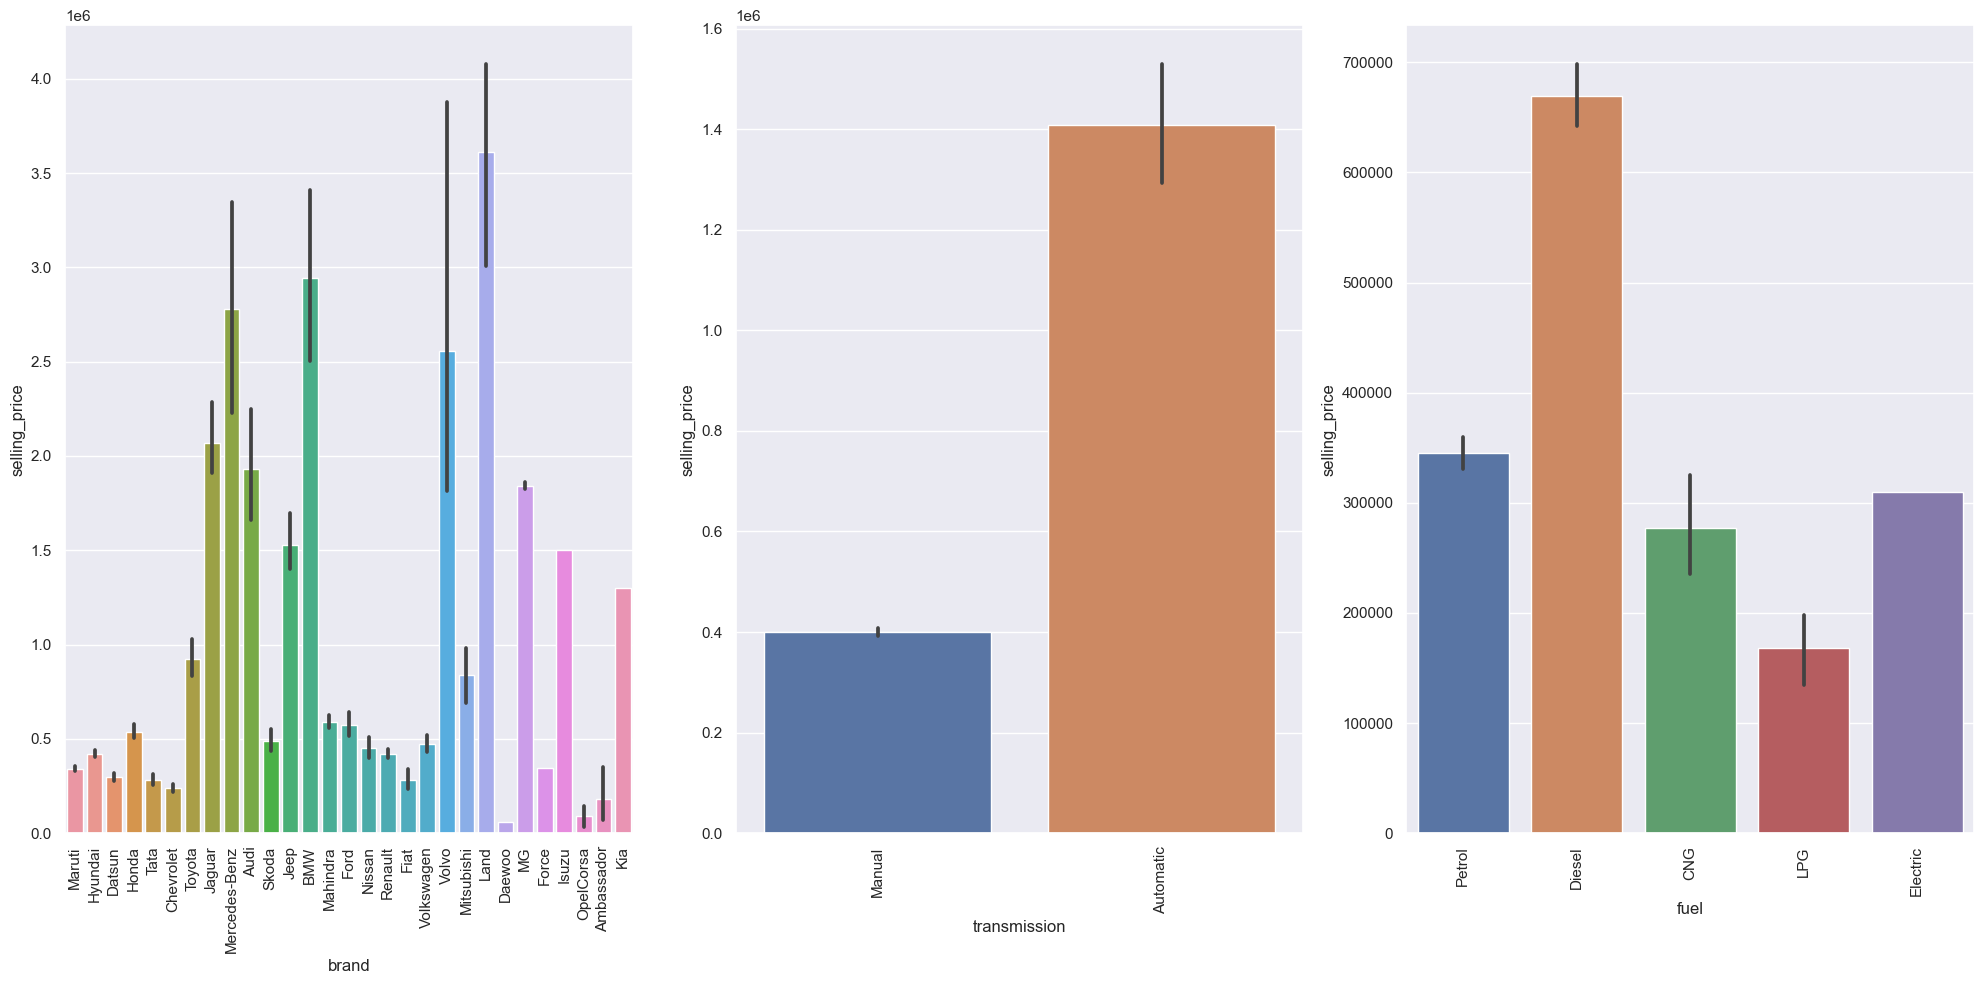

In [166]:
#Visualization of Brand, Transmission and Fuel type in relation to the selling price
cat_var1 = ['brand','transmission', 'fuel']
fig, axs= plt.subplots(nrows=1,ncols=3, figsize=(20,10))

axs = axs.ravel()
for i, var in enumerate(cat_var1):
    sns.barplot(x=var, y='selling_price', data=data, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
                        
fig.tight_layout()
plt.show()                          

- Despite Maruti having the highest number of cars available for resale, their selling prices remain relatively low compared to other brands. On the other hand, Volvo and Land Rover, even with fewer cars available for resale, command the highest selling prices among all the brands.
- Cars equipped with automatic transmission tend to have higher selling prices compared to those with manual transmission.
- In terms of fuel type, diesel cars have the highest selling prices, followed by petrol cars, electric cars, CNG cars, and finally, LPG cars with the lowest selling prices.

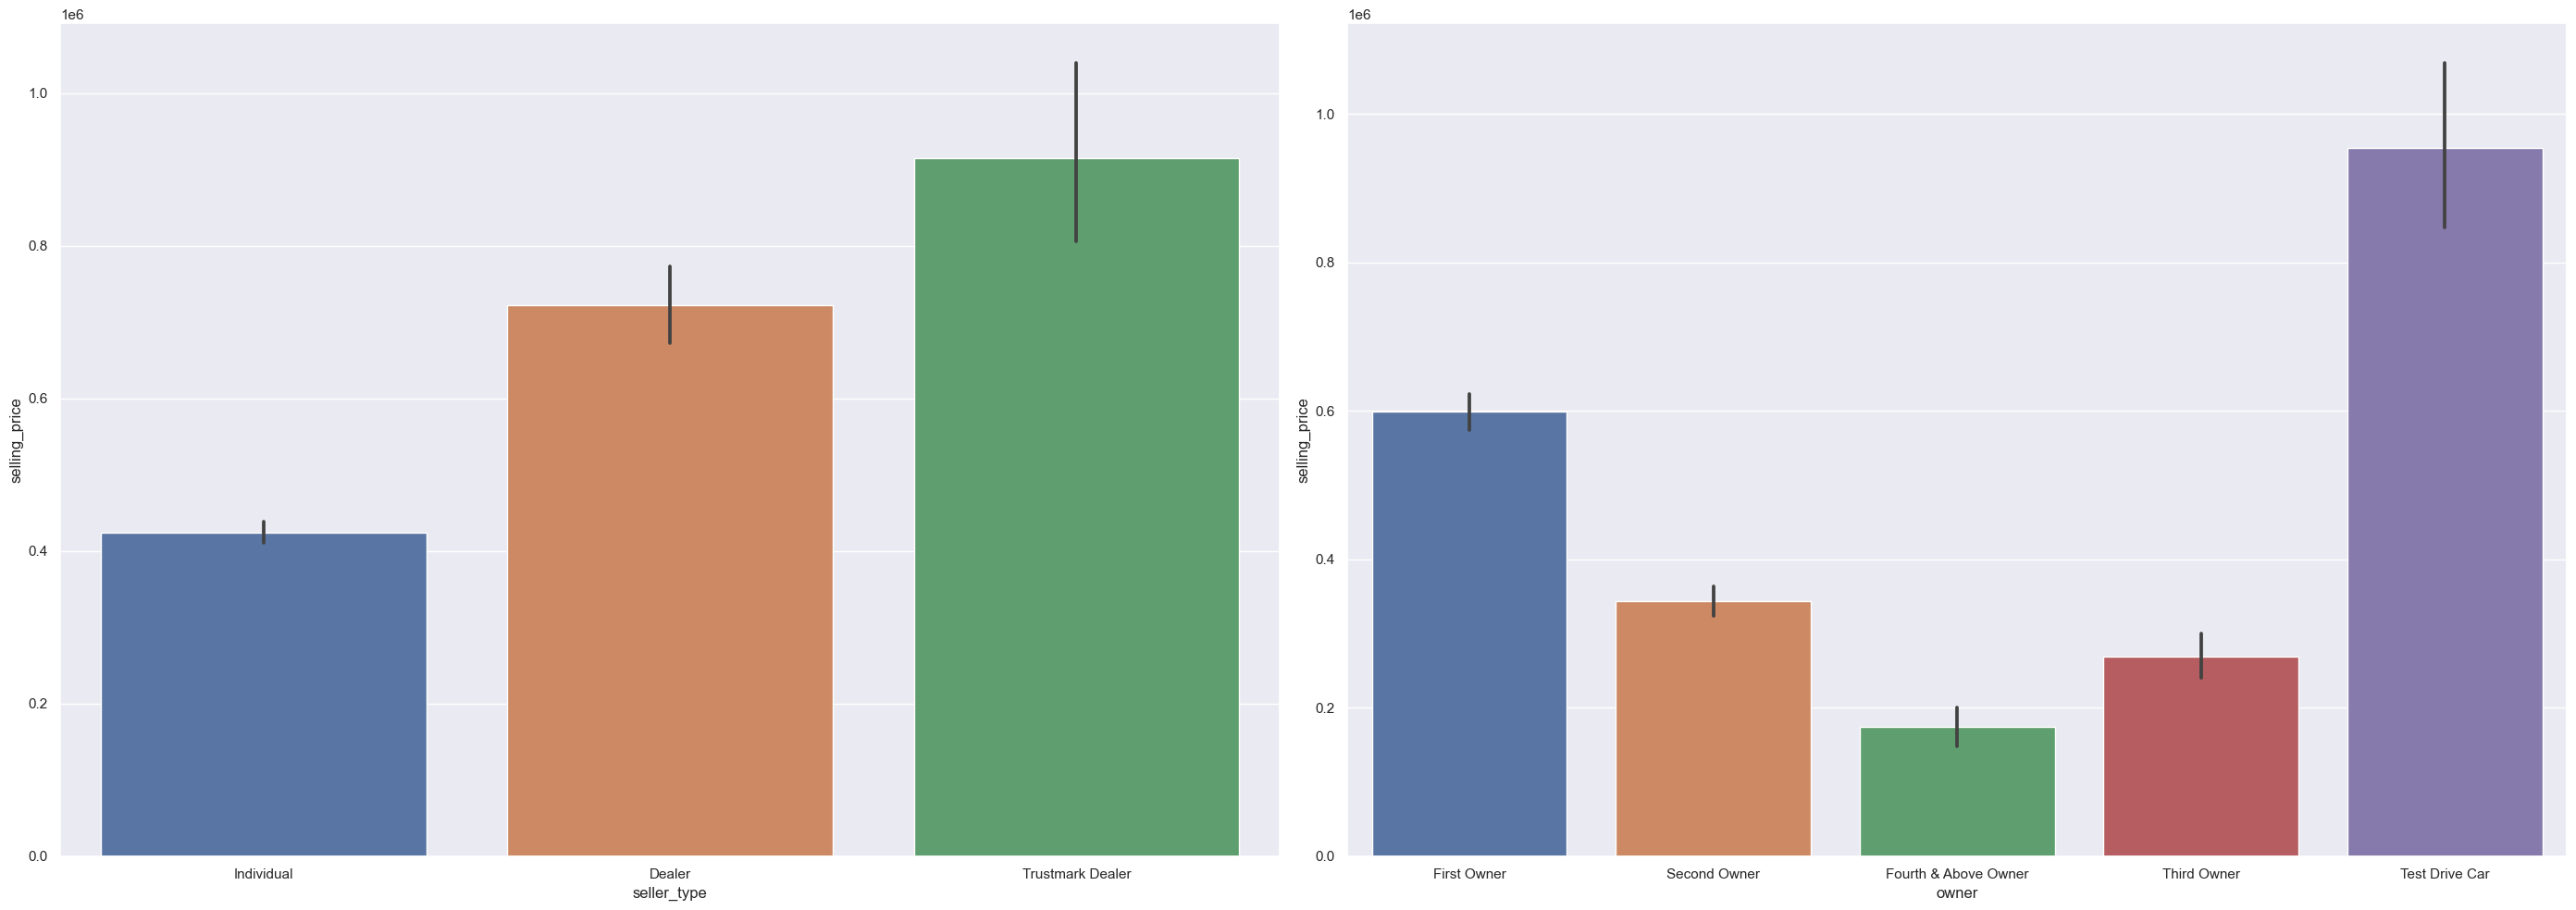

In [167]:
#Visualization of Seller and Owner types in relation to the selling price
cat_var2 = ['seller_type','owner']
fig, axs= plt.subplots(nrows=1,ncols=2, figsize=(28,10))

axs = axs.ravel()
for i, var in enumerate(cat_var2):
    sns.barplot(x=var, y='selling_price', data=data, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels())
                        
fig.tight_layout()
plt.show() 

- Cars sold through Trustmark dealers fetch higher selling prices, while individual sellers are reselling their cars at comparatively lower prices.

- Test drive cars tend to have the highest resale price, followed by cars owned by the initial owner, second owner, and subsequent owners in a chronological sequence.

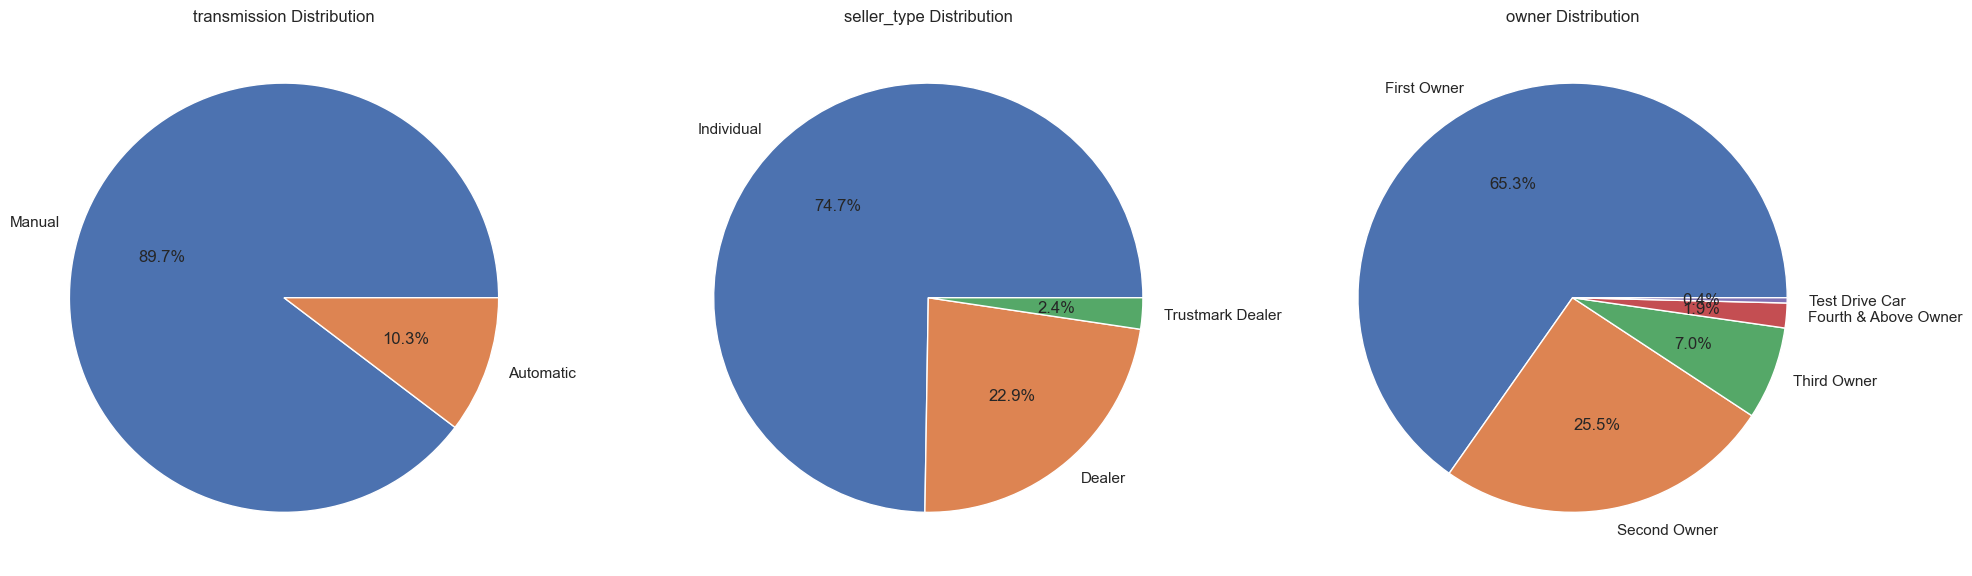

In [108]:
#Pie Chart Representation: Transmission, Seller Type, and Ownership Distribution
cat_var3 = ['transmission','seller_type', 'owner']
fig, axs= plt.subplots(nrows=1,ncols=3, figsize=(20,15))

for i, var in enumerate(cat_var3):
    if i < len(axs.flat):
        cat_counts= data[var].value_counts()
        axs.flat[i].pie(cat_counts, labels= cat_counts.index, autopct= '%1.1f%%')
        axs.flat[i].set_title(f'{var} Distribution')
                        
fig.tight_layout()
plt.show() 

- The majority of cars available for resale, around 90%, are equipped with manual transmission.
- When it comes to the type of sellers, approximately 75% of the cars are being sold by individual sellers. Dealers account for 23% of the sales, while the remaining percentage is represented by Trustmark dealers.
- In terms of ownership, around 65% of the cars are categorized as first-owner vehicles. They are followed by second, third, fourth, and subsequent owners in descending order. Test drive cars make up the smallest proportion, accounting for approximately 0.4% of the total.

#### Data Preprocessing 

In [110]:
# Adding Age column in Dataset
date_time = datetime.datetime.now()

In [111]:
print(date_time.year)      #Current year

2023


In [112]:
data['Age']= date_time.year - data['year']          #Calculation of Car's Age based on Manufacturing Year and Current Year

In [113]:
data.drop('year',axis=1,inplace=True)               #Dropping year column

In [114]:
data.head()                                         

,name,brand,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,Maruti,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,Maruti,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,Hyundai,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,Datsun,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,Honda,450000,141000,Diesel,Individual,Manual,Second Owner,9


<AxesSubplot:xlabel='selling_price'>

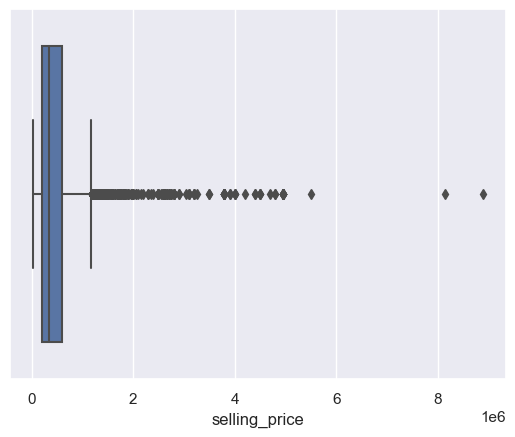

In [115]:
sns.boxplot(data['selling_price'])        #for finding outliers

The box plot was used to identify outliers in the "selling_price" variable of the dataset.

In [116]:
sorted(data['selling_price'],reverse=True)

[8900000,
 8150000,
 5500000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4950000,
 4800000,
 4800000,
 4700000,
 4500000,
 4500000,
 4500000,
 4400000,
 4400000,
 4200000,
 4000000,
 4000000,
 4000000,
 3899000,
 3899000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3800000,
 3500000,
 3500000,
 3256000,
 3200000,
 3200000,
 3200000,
 3100000,
 3100000,
 3100000,
 3050000,
 2900000,
 2900000,
 2800000,
 2800000,
 2800000,
 2800000,
 2800000,
 2750000,
 2750000,
 2750000,
 2750000,
 2700000,
 2700000,
 2700000,
 2700000,
 2675000,
 2675000,
 2650000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2600000,
 2595000,
 2575000,
 2550000,
 2500000,
 2500000,
 2500000,
 2500000,
 2490000,
 2400000,
 2349000,
 2300000,
 2300000,
 2200000,
 2150000,
 2100000,
 2050000,
 2050000,
 2000000,
 2000000,
 2000000,


- The data points with selling prices greater than or equal to 81,50,000 and less than or equal to 89,00,000 were considered as outliers based on the box plot analysis. 

In [157]:
#Eliminating outliers from the selling price within our dataset.

data= data[~(data['selling_price']>=8150000) & (data['selling_price']<=8900000)]

In [118]:
data.shape              #Two rows were eliminated from the dataset due to being identified as outliers.

(4338, 9)

In [119]:
data.head()

,name,brand,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,Maruti,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,Maruti,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,Hyundai,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,Datsun,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,Honda,450000,141000,Diesel,Individual,Manual,Second Owner,9


#### Converting categorical variable into integers as regression models require numerical data to perform calculations.

In [120]:
data['fuel'].unique()                 #Unique values of fuel category 

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [121]:
data['seller_type'].unique()          #Unique values of seller type category 

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [122]:
data['transmission'].unique()         #Unique values of transmission category 

array(['Manual', 'Automatic'], dtype=object)

In [123]:
data['fuel']= data['fuel'].map({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})

In [124]:
data['fuel'].unique()                 #Integers Assigned 

array([0, 1, 2, 3, 4], dtype=int64)

Petrol-0, Disel-1, CNG-2, LPG-3, Electric-4

In [125]:
data['seller_type']= data['seller_type'].map({'Individual':0,'Dealer':1,'Trustmark Dealer':2})

In [126]:
data['seller_type'].unique()          #Integers Assigned 

array([0, 1, 2], dtype=int64)

Individual-0, Dealer-1, Trustmark Dealer-2

In [127]:
data['transmission']=data['transmission'].map({'Manual':0,'Automatic':1})

In [128]:
data['transmission'].unique()         #Integers Assigned 

array([0, 1], dtype=int64)

Manual-0, Automatic-1

In [129]:
data['owner'].unique()                #Unique values of owner category

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [130]:
data['owner']= data['owner'].map({'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4})

In [131]:
data['owner'].unique()               #Integers Assigned 

array([0, 1, 3, 2, 4], dtype=int64)

First owner-0, Second owner-1, Third owner-2, Fourth & Above Owner-3, Test Drive Car-4

In [132]:
data.head()

,name,brand,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,Maruti,60000,70000,0,0,0,0,16
1,Maruti Wagon R LXI Minor,Maruti,135000,50000,0,0,0,0,16
2,Hyundai Verna 1.6 SX,Hyundai,600000,100000,1,0,0,0,11
3,Datsun RediGO T Option,Datsun,250000,46000,0,0,0,0,6
4,Honda Amaze VX i-DTEC,Honda,450000,141000,1,0,0,1,9


In [133]:
#Storing feature matrices in x and response (target) in y
x= data.drop(['name','selling_price','brand'],axis=1)
y= data['selling_price']

In [169]:
  x

,km_driven,fuel,seller_type,transmission,owner,Age
0,70000,0,0,0,0,16
1,50000,0,0,0,0,16
2,100000,1,0,0,0,11
3,46000,0,0,0,0,6
4,141000,1,0,0,1,9
...,...,...,...,...,...,...
4335,80000,1,0,0,1,9
4336,80000,1,0,0,1,9
4337,83000,0,0,0,1,14
4338,90000,1,0,0,0,7


In [135]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   km_driven     4338 non-null   int64
 1   fuel          4338 non-null   int64
 2   seller_type   4338 non-null   int64
 3   transmission  4338 non-null   int64
 4   owner         4338 non-null   int64
 5   Age           4338 non-null   int64
dtypes: int64(6)
memory usage: 237.2 KB


In [136]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4338, dtype: int64

In [137]:
#Splitting the Dataset in training set and test set
from sklearn.model_selection import train_test_split

In [138]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20, random_state=42)   #Creation of Test Data: 20% Split with Random State 42

In [139]:
#Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [140]:
#Model Training
lr= LinearRegression()
lr.fit(x_train,y_train)

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

xgb= GradientBoostingRegressor()
xgb.fit(x_train, y_train)

xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [141]:
#Prediction on test data
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = xgb.predict(x_test)
y_pred4 = xg.predict(x_test)    

In [142]:
#Model Evaluation
from sklearn import metrics

In [143]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

The R2 score, also known as the coefficient of determination, is a statistical measure used to evaluate the performance of regression models.


In [144]:
print(score1, score2, score3, score4)

0.3704434044251881 0.6947536370883992 0.6367500394034089 0.710279420565176


In [145]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
                          "R2_SCORE":[score1,score2,score3,score4]})

R2 scores provide insights into how well each model captures and explains the variance in the test data. Higher R2 scores indicate better predictive performance, as the models can explain a larger proportion of the variance in the target variable compared to the actual values.

In [146]:
final_data

,Models,R2_SCORE
0,LR,0.370443
1,RF,0.694754
2,GBR,0.636750
3,XG,0.710279


- LR (Linear Regression) has the lowest R2 score, indicating the lowest predictive performance among the models. It explains approximately 37% of the variance in the data.

- RF (Random Forest) achieved a significantly higher R2 score compared to LR, indicating stronger predictive capabilities. It explains around 69% of the variance in the data.

- GBR (Gradient Boosting Regression) falls in between LR and RF, with an R2 score of approximately 64%. It demonstrates moderate predictive performance.

- XG (Extreme Gradient Boosting) has the highest R2 score among the models, indicating the strongest predictive abilities. It explains approximately 71% of the variance in the data.

In summary, the RF and XG models exhibit the highest R2 scores, indicating better overall performance in explaining the variance in the data compared to LR and GBR.

<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

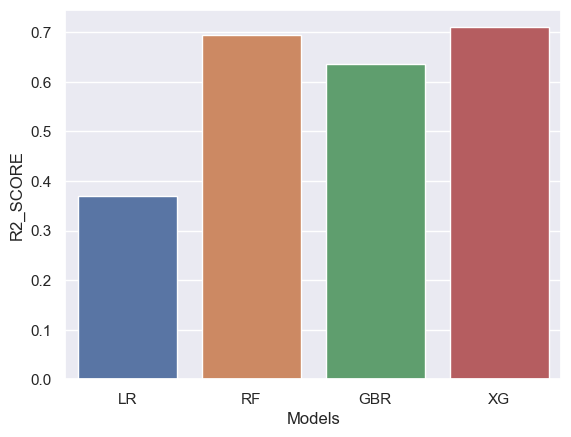

In [147]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

The bar graph visually illustrates the differences in the R2 scores, clearly showing that RF and XG outperform LR and GBR in terms of their predictive performance.

In [170]:
#XG Model Implementation and Evaluation
xg = XGBRegressor()
xg_final= xg.fit(x,y)

In [149]:
#Saving the Model
import joblib

In [150]:
joblib.dump(xg_final, 'car_price_predictor')      #Name Assigned

['car_price_predictor']

In [151]:
model = joblib.load('car_price_predictor')        #Loading Predictor

In [152]:
#Prediction on New Dataset
import pandas as pd
data_new = pd.DataFrame({
    'km_driven':30000,
    'fuel':1,
    'seller_type':1,
    'transmission':1,
    'owner':2,
    'Age':6
},index=[0])

In [153]:
model.predict(data_new)

array([1999185.8], dtype=float32)

### GUI

In [154]:
#Car Price Calculator
from tkinter import *
import joblib

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    
    model = joblib.load('car_price_predictor')
    data_new = pd.DataFrame({
    'km_driven':p1,
    'fuel':p2,
    'seller_type':p3,
    'transmission':p4,
    'owner':p5,
    'Age':p6
},index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Price").grid(row=7)
    Label(master, text=result).grid(row=9)
    print("Car Price", result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning")
label = Label(master, text = "Car Price Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="km_driven").grid(row=1)
Label(master, text="fuel").grid(row=2)
Label(master, text="seller_type").grid(row=3)
Label(master, text="transmission").grid(row=4)
Label(master, text="owner").grid(row=5)
Label(master, text="Age").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

### Conclusion

The car price prediction model we developed incorporates several key features, including the type of fuel, seller type, transmission, owner information, and the age of the car. These factors were found to be influential in predicting the price of used cars.

During our analysis, we observed that certain features significantly influenced the predicted prices. For instance, the type of fuel used played a role, with diesel cars typically commanding higher prices followed by petrol, electric, CNG, and LPG cars.

Additionally, the seller type was found to have an impact on the selling price. Cars sold through Trustmark dealers fetched higher prices, while individual sellers typically resold their cars at lower prices. The type of transmission was also found to be a factor, with cars equipped with automatic transmission generally having higher selling prices compared to those with manual transmission.

Furthermore, we examined the car's age by subtracting the manufacturing year from the current year. This allowed us to estimate the age of the vehicle, which was a significant predictor of price. In general, newer cars tended to have higher prices compared to older ones.

Our car price prediction model provides valuable insights into the factors influencing the pricing of used cars, even without considering the specific mileage feature. By considering the available features, our model can assist in estimating fair and accurate prices for pre-owned vehicles. However, continuous evaluation, refinement, and additional data may further enhance the model's performance and accuracy.